In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv('API_KEY')

In [98]:
from os import path
from PIL import Image
from googleapiclient.discovery import build
from IPython.display import JSON
from dateutil import parser
import pandas as pd
import numpy as np
import helper_functions as hf

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# The channels which are to be analysed need to be added here

channel_ids = [
    'UC0intLFzLaudFG-xAvUEO-A', # https://www.youtube.com/c/NotJustBikes
    'UCGc8ZVCsrR3dAuhvUbkbToQ', # https://www.youtube.com/c/CityBeautiful
    'UCfgtNfWCtsLKutY-BHzIb9Q', # https://www.youtube.com/c/CityNerd
    'UC-LM91jkqJdWFvm9B5G-w7Q', # https://www.youtube.com/c/AlanFisher1337
    'UCK1XzxcKXB_v_dcw_tflC1A' # https://www.youtube.com/c/OBFYT
    ]

In [103]:

# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"
youtube = build(
    api_service_name, api_version, developerKey=api_key)

In [102]:
# Get all the stats from the channels, using helper functions
channel_stats = hf.get_channel_stats(youtube, channel_ids)
video_ids = hf.get_video_ids(youtube, channel_stats['playlistId'][0])
video_df = hf.get_video_details(youtube, video_ids)
comments = hf.get_comments_in_videos(youtube, video_ids)

## Data pre-processing

In [13]:
# Verify whether any row contains null characters
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags              False
publishedAt       False
viewCount         False
likeCount         False
favouriteCount     True
commentCount      False
duration          False
definition        False
caption           False
dtype: bool

In [88]:
# Check the types of video_df
video_df.dtypes

video_id                               object
channelTitle                           object
title                                  object
description                            object
tags                                   object
publishedAt           datetime64[ns, tzutc()]
viewCount                             float64
likeCount                             float64
favouriteCount                        float64
commentCount                          float64
duration                               object
definition                             object
caption                                object
publishDayName                         object
durationSecs                          float64
tagCount                                int64
title_no_stopwords                     object
dtype: object

In [104]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,y9KNax1QpD4,Alan Fisher,Rural Towns don't have to Suck,I desperately wanted to talk about the D&H can...,"[armchair urbanist, urban planning, not just b...",2022-07-18T14:00:41Z,223545,17012,None,1904,PT7M31S,hd,false
1,4QlZx1sjg4Y,Alan Fisher,"Grid Cities are Fine, and OBF is a Copycat",The difference between you and me is that I do...,"[armchair urbanist, OBF, city design, Urban pl...",2022-07-02T14:00:02Z,299278,21355,None,2158,PT13M36S,hd,false
2,Rt8W9iGLRA4,Alan Fisher,The Worst Transit Project in America and the F...,"yes, I know that I spelled Broad Street wrong....","[armchair urbanist, septa, norristown high spe...",2022-06-25T14:00:14Z,158244,8683,None,1010,PT9M9S,hd,false
3,zQ6EIxlbUOk,Alan Fisher,Are Monorails good? What Housing should we bui...,"Its like half in the bag, except with Trains.\...","[armchair urbanist, donoteat01, Well there's y...",2022-06-08T14:00:32Z,42130,2006,None,379,PT1H34M45S,hd,false
4,rcjr4jbGuJg,Alan Fisher,California High Speed Rail has not Failed and ...,Your ability to put stock videos over a script...,"[armchair urbanist, CAHSR, trains, urban plann...",2022-05-31T14:00:21Z,745268,46618,None,6041,PT17M52S,hd,false
5,JbqNUqdZlwM,Alan Fisher,Why Philadelphia's Streets are better than oth...,when the road be too girthy\n\nThe Bike:\nhttp...,"[armchair urbanist, urban planning, not just b...",2022-05-12T14:00:07Z,440876,14952,None,1413,PT8M8S,hd,false
6,AOndVouUSRA,Alan Fisher,"Real Solar Punk is Smart Land Use, Not Gimmick...","Farms good, suburbs bad.\n\nGo follow Miles!\n...","[urban planning, not just bikes, transit, trai...",2022-05-03T14:00:03Z,184961,13724,None,1418,PT5M58S,hd,false
7,0XrBoasOeiY,Alan Fisher,Ranking the 12 Largest American Cities on Urba...,Which American city is the worst? Find out and...,"[armchair urbanist, city planning, tier list, ...",2022-03-08T14:00:02Z,150887,7003,None,1544,PT38M20S,hd,false
8,JGG5WRBPeFk,Alan Fisher,Parking Garages Represent Lazy and Terrible Pl...,"Car building bad, human building good.\n\nThe ...","[car parks, urban planning, not just bikes, tr...",2022-02-22T13:30:04Z,192727,10742,None,1447,PT6M38S,hd,false
9,0qIsUyidFjs,Alan Fisher,You Deserve Better Transit #shorts,The Armchair Urbanist Series: \nhttps://www.yo...,"[armchair urbanist, urban planning, trains, am...",2022-01-27T14:00:00Z,62165,7269,None,598,PT39S,hd,false


In [15]:
# Convert several columns from object to numeric
numeric = ['viewCount', 'likeCount', 'favouriteCount', 'commentCount']
video_df[numeric] = video_df[numeric].apply(pd.to_numeric, errors = 'coerce', axis=1)

In [105]:
# Convert the publish dates to time values
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime('%A'))

In [17]:
# Convert the duration of the videos into seconds
import isodate
video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [19]:
# Add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x))

## EDA

### Best performing videos

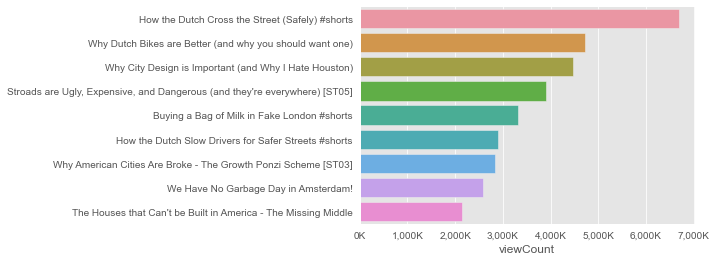

In [35]:
plt.style.use('ggplot')
ax = sns.barplot(x = 'viewCount', y = 'title', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plt.ylabel(None)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### Worst performing videos

f:\Anaconda3\envs\youtube-api\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9728 (\N{BLACK SUN WITH RAYS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
f:\Anaconda3\envs\youtube-api\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


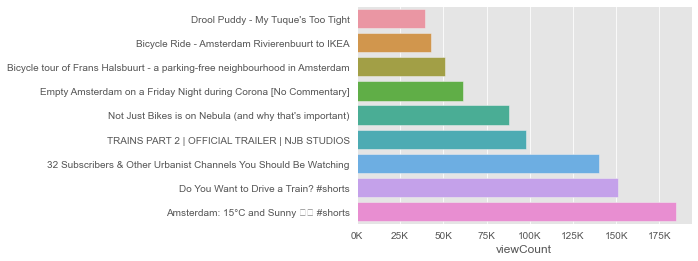

In [40]:
ax = sns.barplot(x = 'viewCount', y = 'title', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plt.ylabel(None)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

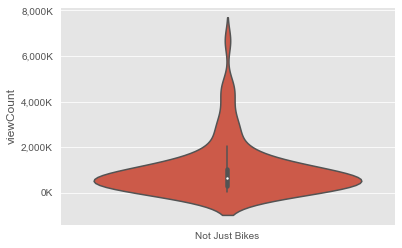

In [44]:
ax = sns.violinplot(x = video_df['channelTitle'], y = video_df['viewCount'])
plt.xlabel(None)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

### Views vs likes and comments

<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

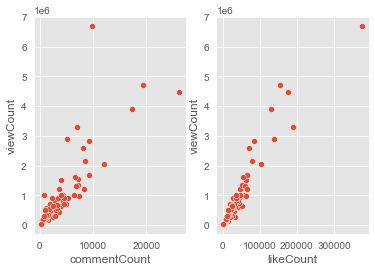

In [45]:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x = 'commentCount', y='viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x = 'likeCount', y='viewCount', ax = ax[1])

### Video duration

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

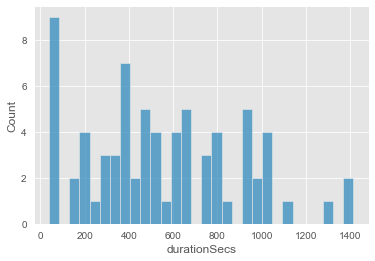

In [46]:
sns.histplot(data = video_df, x = 'durationSecs', bins=30)

<Figure size 432x288 with 0 Axes>

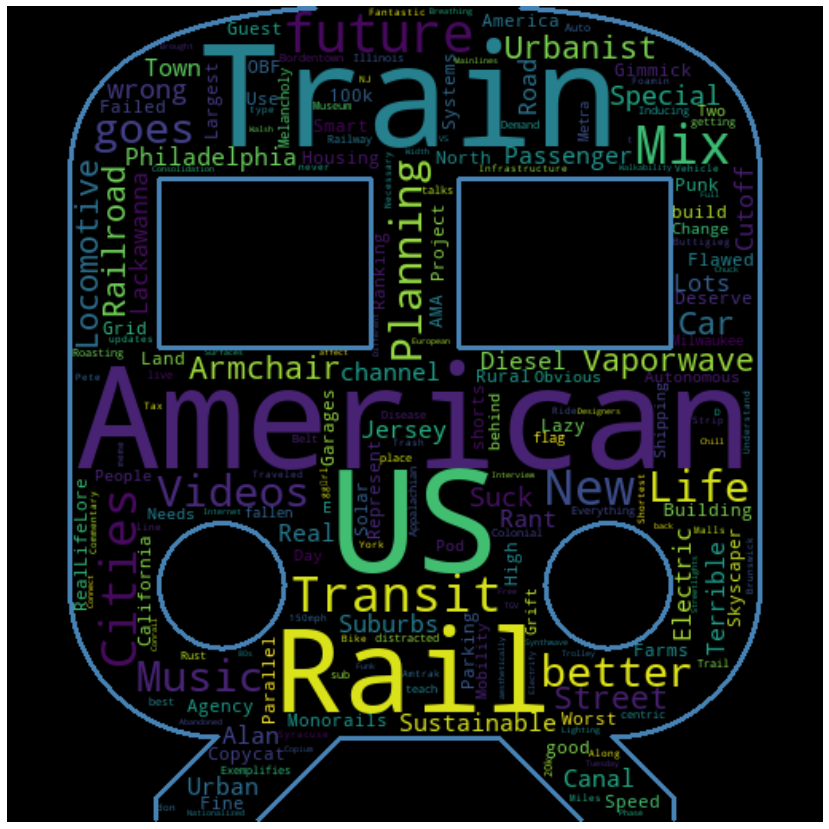

<Figure size 432x288 with 0 Axes>

In [107]:
# A word cloud of the relevant words from the titles from the video of one channel

d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
train_mask = np.array(Image.open(path.join(d, 'train_mask.png')))


stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])


all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)
    
wordcloud = WordCloud(width= 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False, mask=train_mask, contour_width=3, contour_color='steelblue').generate(all_words_str)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()


Text(0.5, 0, '')

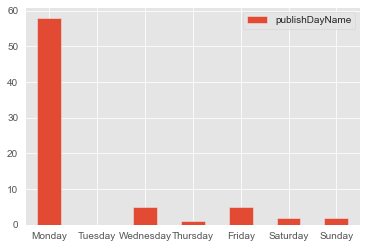

In [75]:
# The schedule of the videos from one channel
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='publishDayName', rot=0)
plt.xlabel(None)